In [2]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py
%run -i ../../tools/predict_functions.py

# Biology

### Try with Random Forest

The random forest does not need a Cross Validation because they do some shuffle work inside of them, but anyway in this Project a cross validation will be implemented

In [4]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [5]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

### Con Kfold  5

Mean Score: 6.00260209828


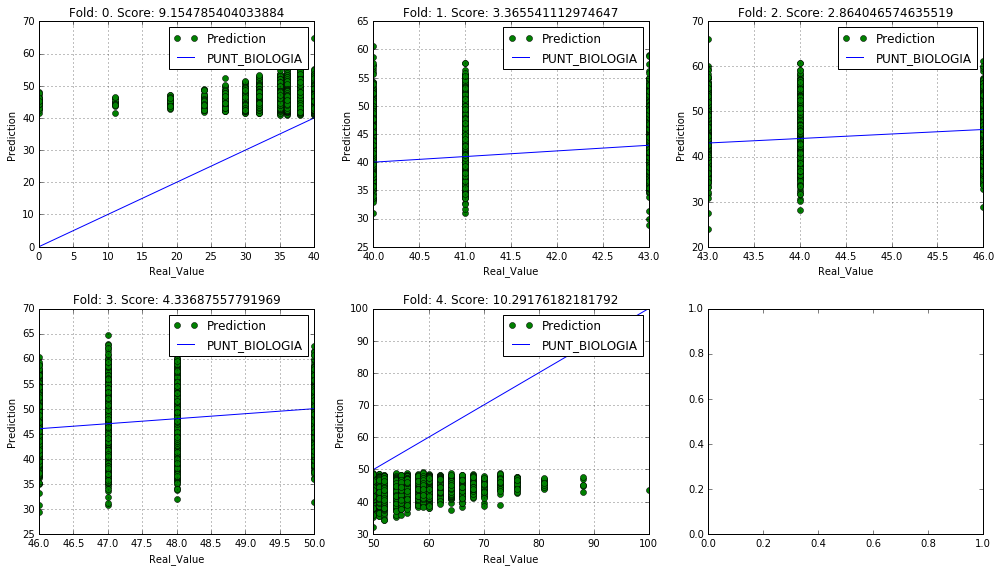

In [11]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con Kfold  5 y Shuffle  True

Mean Score: 4.52981912392


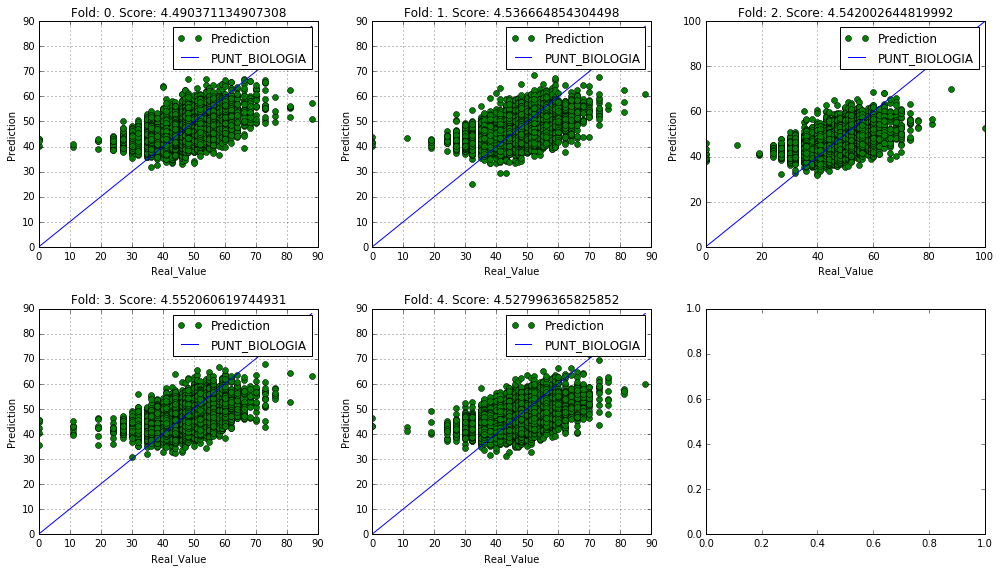

In [12]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5, shuffle = True)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con ShuffleSplit

Mean Score: 4.5386845599
elapsed time: 46.650659799575806


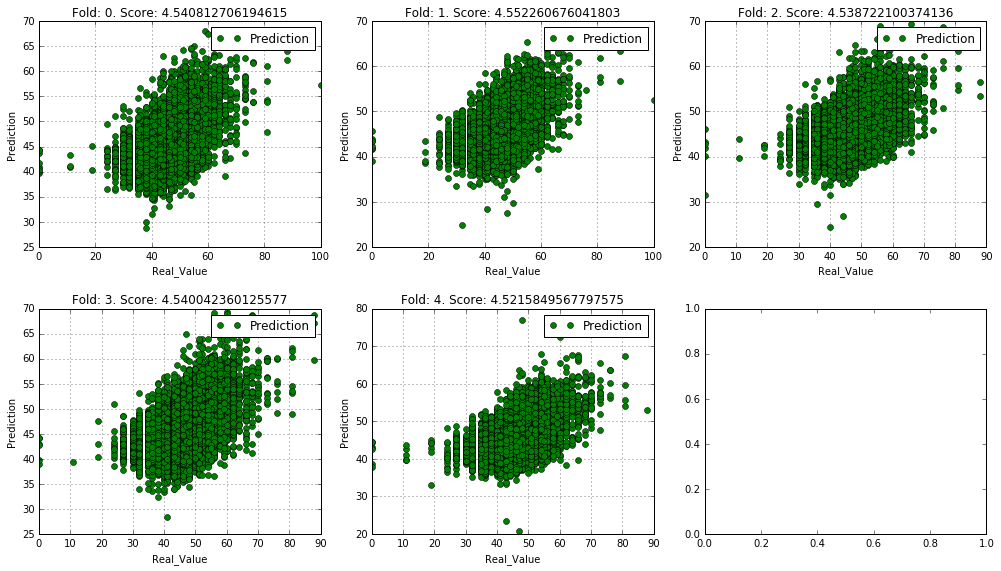

In [6]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, rs)
print('elapsed time:', time()-st)

## Feature Analysis

Here i get the Feature_importances attribute from the Random Forest object and the columns of our features data input.  
Then concatenate them into a Dataframe.  

Then sort them by their importance and select just the columns that has more that 1% of importance in the model.

In [58]:
fi = rf.feature_importances_
cols = X.columns
arr = {'col1':fi, 'col2':cols}
Feature_imp = pd.DataFrame(arr)
Feature_imp.sort_values(by='col1', inplace=True)

In [86]:
S_Feature_imp = Feature_imp.iloc[12:]

In [87]:
S_Feature_imp = S_Feature_imp[['col2']].values #Guarda un array de listas de un elemento / Saves an array of one element lists
New_X_List = [i[0] for i in S_Feature_imp] #Lo convierto 

In [88]:
New_X_List

['ESTU_GENERO',
 'ESTU_ACT_PROX_ANNO',
 'COD_INTERDISCIPLINAR',
 'COLE_CARACTER',
 'ESTU_RESIDE_DEPTO',
 'FAMI_APORTANTES',
 'FAMI_NUM_HERMANOS_EDUSUPERIOR',
 'COLE_JORNADA',
 'FAMI_OCUPA_MADRE',
 'ESTU_CARRDESEADA_RAZON',
 'FAMI_PERSONAS_HOGAR',
 'ESTU_RAZONINSTITUTO',
 'FAMI_OCUPA_PADRE',
 'FAMI_EDUCA_PADRE',
 'FAMI_NUM_HERMANOS',
 'FAMI_EDUCA_MADRE',
 'COLE_VALOR_PENSION',
 'ESTU_RESIDE_MCPIO',
 'ESTU_NACIMIENTO_MES',
 'ESTU_IES_COD_DESEADA',
 'ESTU_NACIMIENTO_DIA',
 'ESTU_NACIMIENTO_ANNO',
 'ESTU_CARRDESEADA_COD',
 'COLE_COD_ICFES',
 'FAMI_INGRESO_FMILIAR_MENSUAL']

## <span style='color: red'> New List of Predictive Variables to USE </span>
Try again with the Random Forest

In [90]:
X2 = X[New_X_List]

Mean Score: 4.53395835868
elapsed time: 59.937546253204346


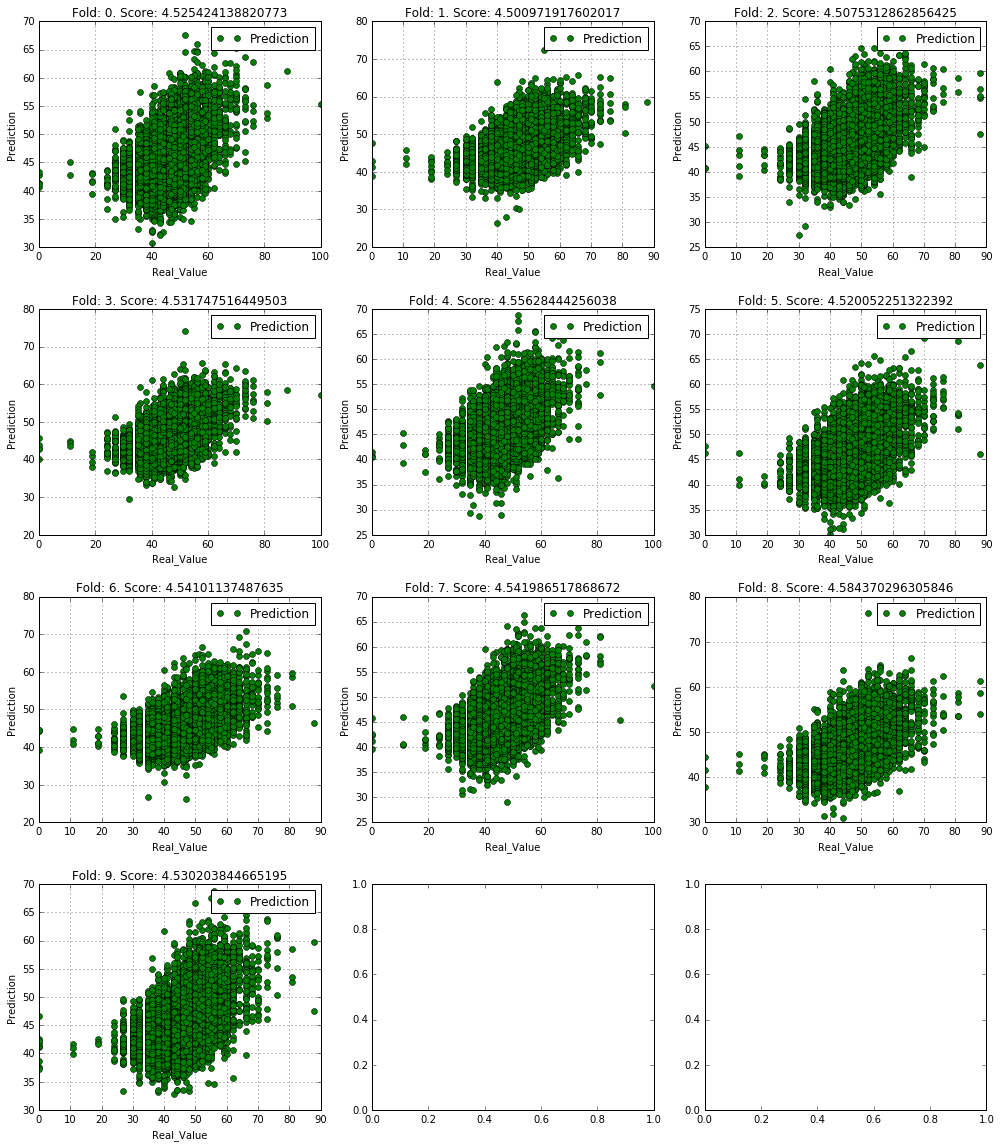

In [93]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X2.shape[0], n_iter=10, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X2, Y, rs)
print('elapsed time:', time()-st)

## <span style='color: red'> I can see that the score did not improve, BUT the execute time was reduced round 15 seconds</span>

### Exp  2

The Model with the Data raised to the power of 2 gives:
Mean Score: 6.00530565426


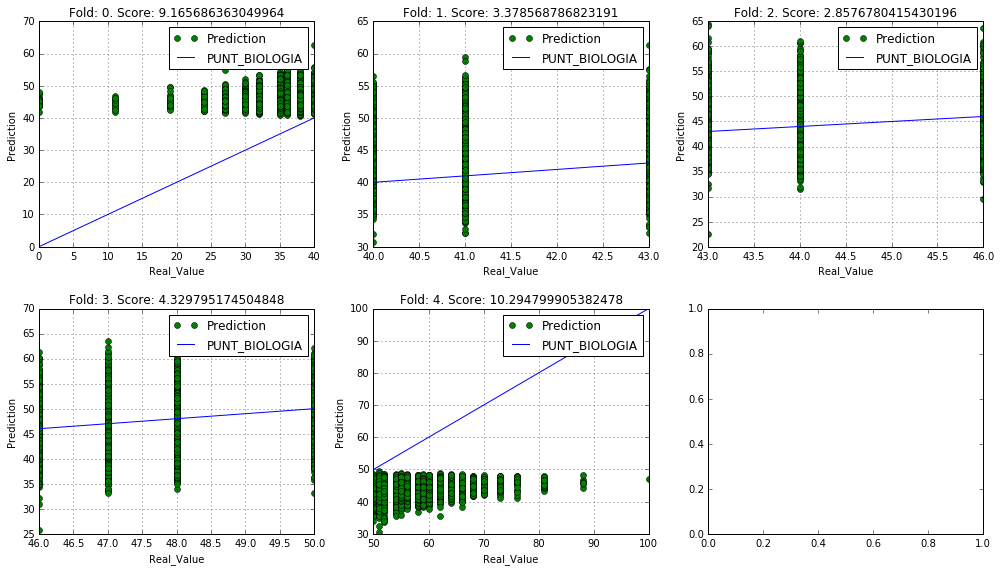

In [17]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.5327218958
This tooks 43.854867935180664


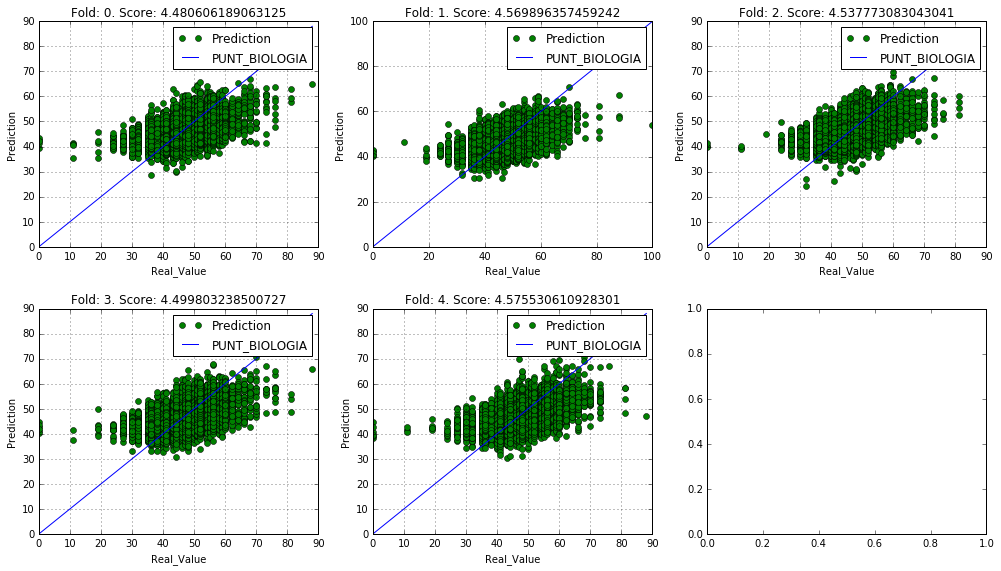

In [6]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)
print('This tooks', time()-st)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.53152780286
This tooks 44.38910913467407


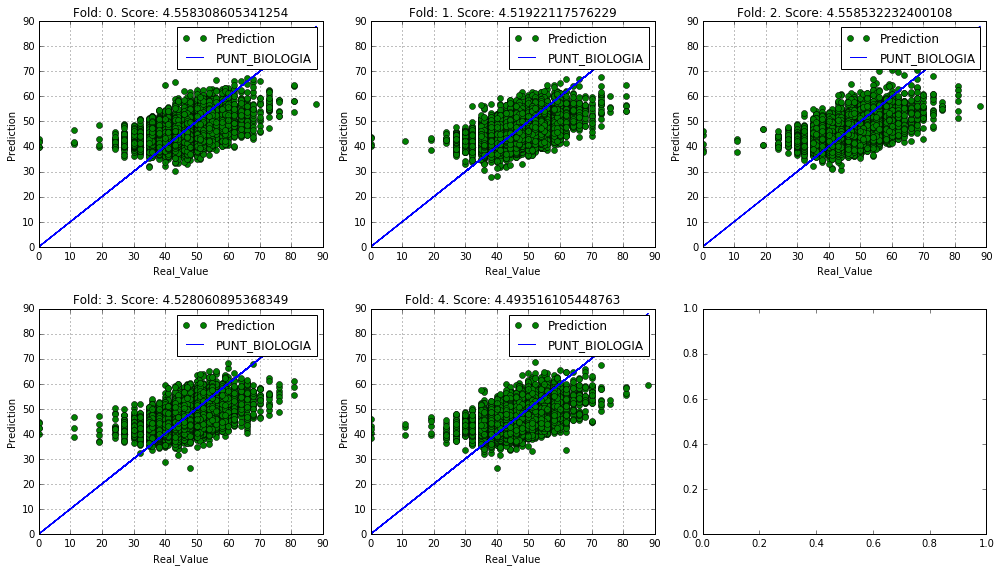

In [7]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('This tooks', time()-st)

### EXP 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 6.01001039265


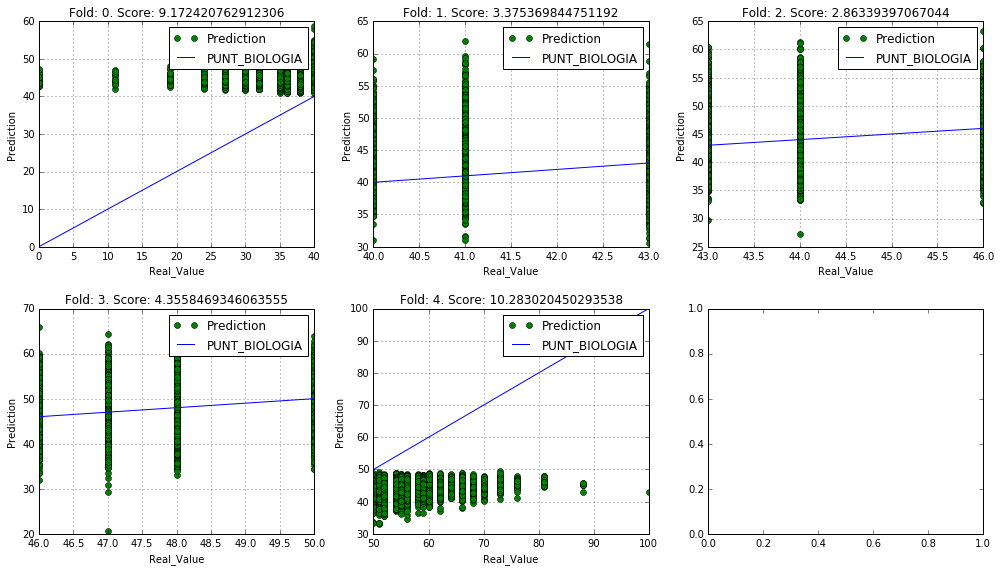

In [20]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.52042813347


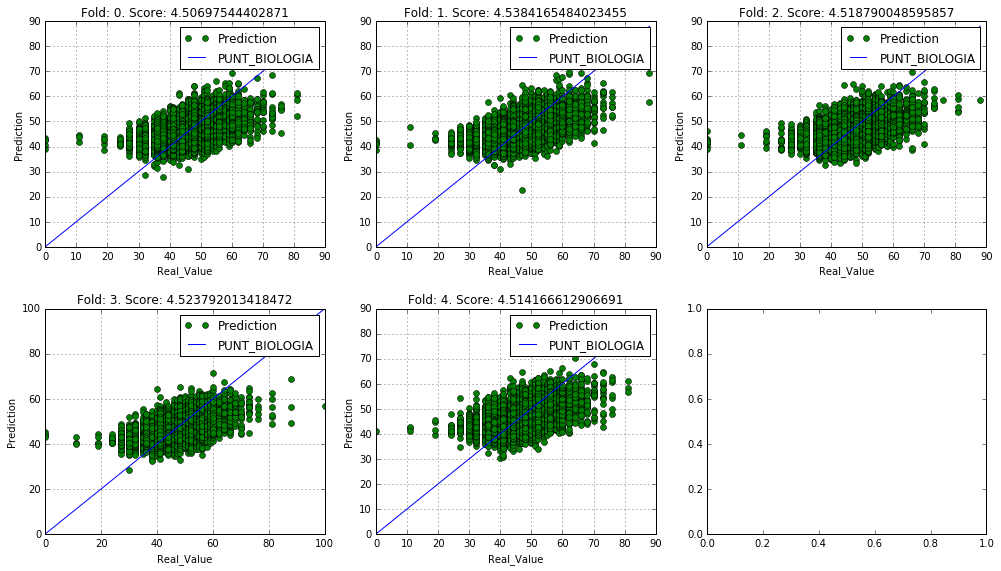

In [21]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.53278636858


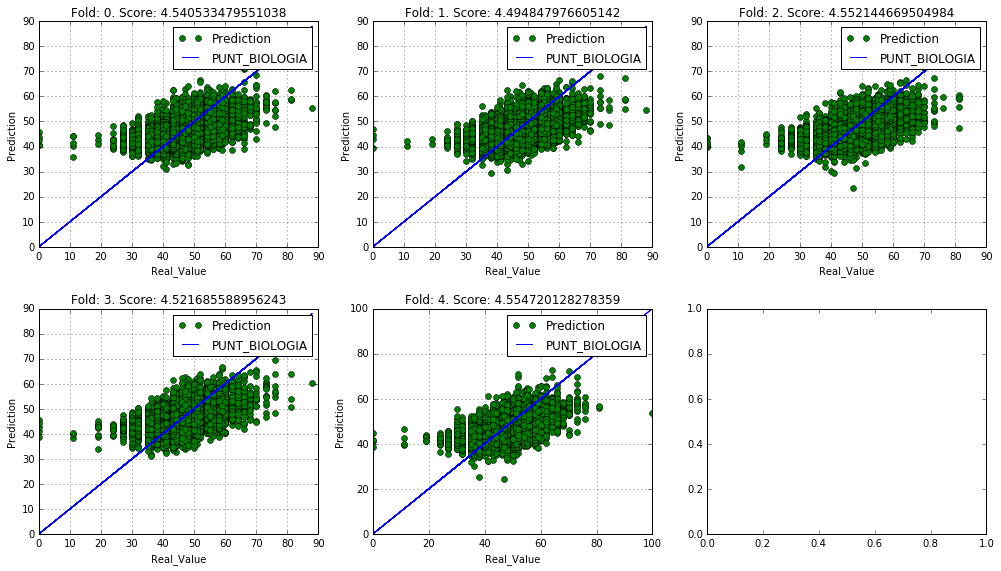

In [22]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)

### Polynomial Features 2

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 5.99884023652
The prediction took: 1543.2259378433228 seconds


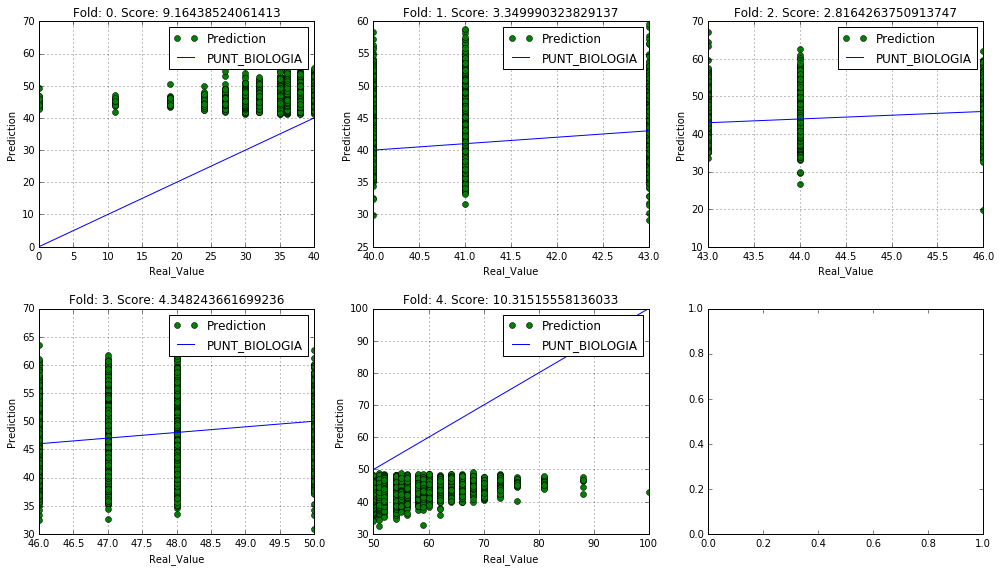

In [25]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.51956970729
The prediction took: 1417.1782722473145 seconds
this tooks: 1417.1788022518158


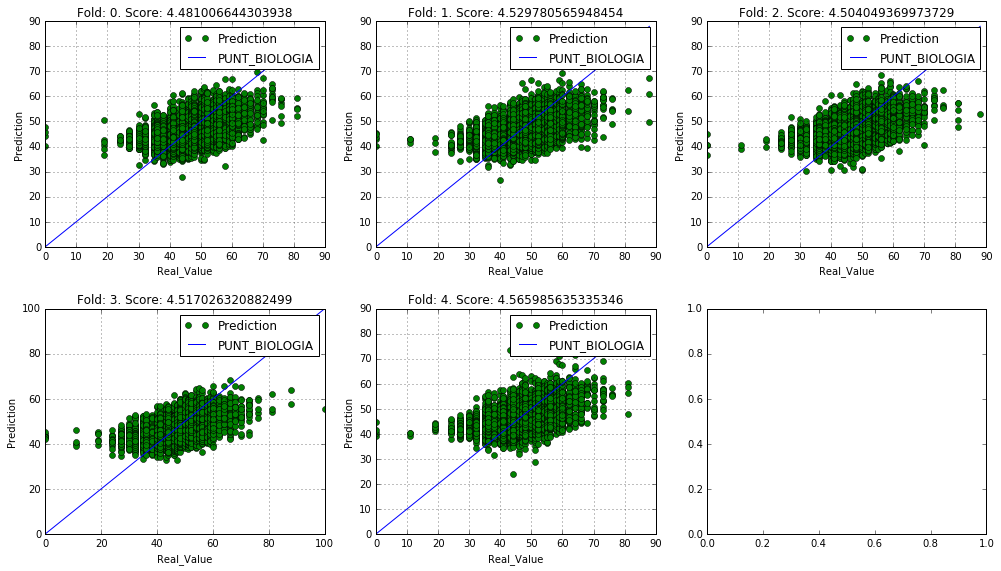

In [8]:
st = time()
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)
print('this tooks:', time()-st)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.51845563092
The prediction took: 1438.4852969646454 seconds


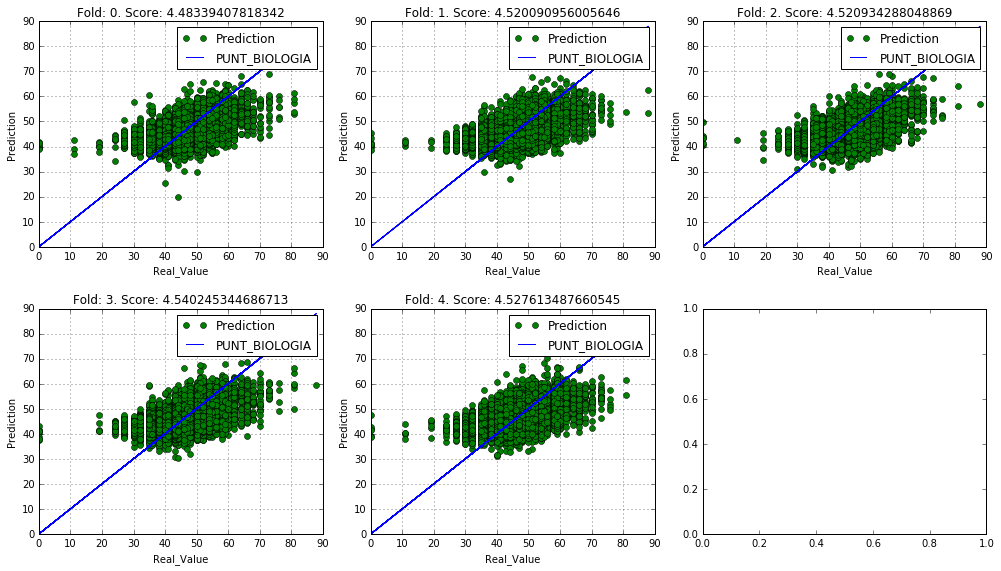

In [ ]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

### Polynomial Features 3
With this degree the Random Forest take too long, so for that reason was not implemented with cross validation.

In [7]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
x_list = D_sorted.columns.difference(y_list)
New_X = D_sorted.filter(items = x_list)
Y_train = D_sorted.filter(items = y_list)
Poly = PolynomialFeatures(degree = 3)
Poly_X = Poly.fit_transform(New_X)
print('data ready')
Poly_X = pd.DataFrame(Poly_X)
st = time()
rf = RandomForestRegressor(n_jobs=4, oob_score=True)
rf.fit(Poly_X, Y_train['PUNT_BIOLOGIA'])
print('MAE: ',MAD(Y_train['PUNT_BIOLOGIA'], rf.oob_prediction_))
print('this takes: ', time()-st, 'seconds')

data ready
MAE:  5.474256115702554
this takes:  6607.6687552928925 seconds


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


**Now trying with the data reduced**

In [12]:
def get_exp_prediction2(estimator, exp, S_Data, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the estimator
    The exponent
    The sorted data by values of the target to predict
    The column(target) that will be analyzed
    The number of folds that will be created
    KFShuffle if True the Kfolds shuffle the data before split it
    shuffle_split if True the function DON'T use Kfolds, instead use a ShuffleSplit object
    And return the score of the model, and the plot of the prediction"""
    New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    New_X = S_Data.filter(items = New_x_list)
    exped_X = New_X**exp
    Y_train = S_Data.filter(items = y_list)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(exped_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    print('The Model with the Data raised to the power of', exp, 'gives:')
    plot_predictions_KF(estimator, target, exped_X, Y_train, kf)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.5089396422
This tooks 44.188232421875


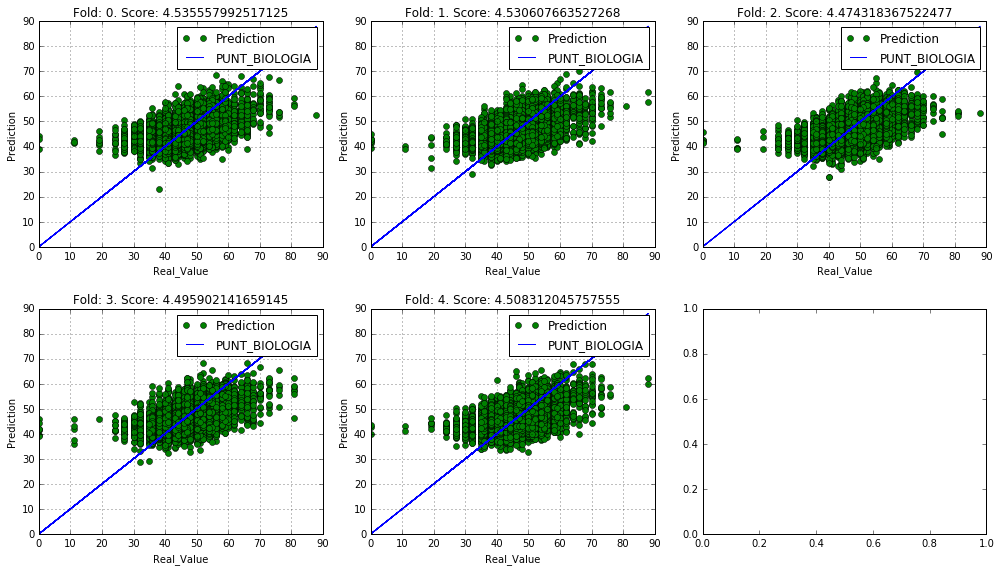

In [13]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('This tooks', time()-st)

FALTA ESTO

In [11]:
def get_Poly_prediction2(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    New_X = D_sorted.filter(items = New_x_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

In [ ]:
st = time()
rf = RandomForestRegressor()
get_Poly_prediction2(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)
print('this tooks:', time()-st)

# Results Obtained

|        |1       |    2    |      3     |EXP 2       |||EXP 3       |||Poly 2       |||Poly 3 / No CrossV     |
|--------|-------:|--------:|-----------:|---:|---:|---:|---:|---:|---:|----:|---:|---:|---:|
|        |KFold   |KFShuffle|ShuffleSplit|1   |2   |3   |1   |2   |3   |1    |2   |3   |1   
|Biologia|6.002   |4.52     |4.53|6.005|4.51|4.52|6.01|4.52|4.53|5.99  |4.52 |4.51|5.47|

The 2 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]    |
|--------:          |------------------:|------------------:|
|**Algorithm**      |EXP 2/ ShuffleSplit|Poly 2/KFoldShuffle|
|**Old Data**       |4.53 / 44.38       |4.51 / 1417.17     |
|**New X Data**     |4.50 / 44.18       |0.0 / 0.0          |


## Learning Curves

The following function (*plot_learning_curve*) was taken from the [python documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']

New_X = D_sorted.filter(items = New_x_list)
Y_train = D_sorted.filter(items = y_list)

title = "Learning Curve (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_jobs=4)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)